# iris 데이터에 대한 군집분석

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# K-Means 알고리즘
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# CLustering 알고리즘의 성능 평가 측도
from sklearn.metrics import homogeneity_score, \
    completeness_score, v_measure_score, \
    adjusted_rand_score, silhouette_score, rand_score, \
    calinski_harabasz_score
from sklearn.metrics.cluster import contingency_matrix

from sklearn.preprocessing import StandardScaler  # 변수 표준화
from sklearn import metrics

C:\Users\chaew\AppData\Local\Temp\ipykernel_45784\2855496632.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 1. 데이터 가져오기

In [3]:
# iris data 
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target']=iris.target

In [6]:
df['target'] = df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# 변수 표준화
scaler = StandardScaler() # 변수 표준화 클래스
scaler.fit(X)  # 표준화를 위해 변수별 파라미터(평균, 표준편차) 계산
# scaler.mean_, scaler.scale_
X_std = scaler.transform(X)  # 훈련자료 표준화 변환

In [10]:
km = KMeans(
    n_clusters=3,
    init="k-means++",
    max_iter=100,
    n_init=1
)
km.fit(X_std) # k-means alogorithm 적합
km.labels_    # 결과: 레코드별 군집 라벨

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2])

In [11]:
km.cluster_centers_ # 결과: 군집별 컬럼별 중심평균

array([[-0.16840578, -0.9726981 ,  0.2598706 ,  0.17543327],
       [-1.00206653,  0.90625492, -1.30310821, -1.25634413],
       [ 1.03359865,  0.00613858,  0.94360463,  0.9725624 ]])

In [12]:
km.inertia_ # 목적함수의 값

140.90153181202442

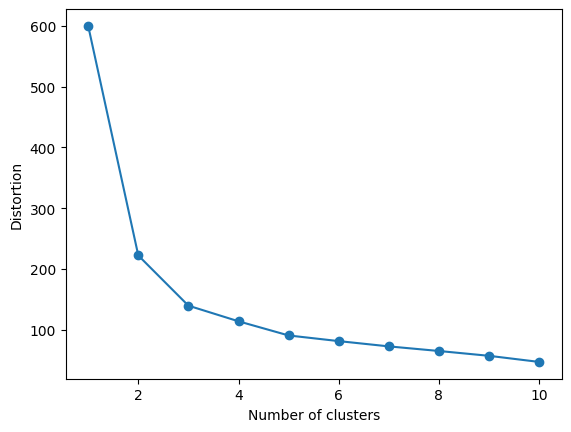

In [13]:
distortions = []

for i in range(1, 11):
    kmeans_i = KMeans(n_clusters=i, init="k-means++", max_iter=100, n_init=1, random_state=0)  # 모델 생성
    kmeans_i.fit(X_std)   # 모델 훈련
    distortions.append(kmeans_i.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

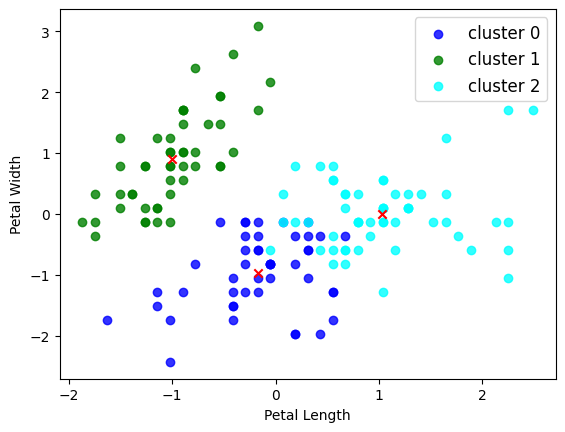

In [14]:
# Clustering 결과 scatter plot
K = 3
cluster = km.labels_
color=['blue','green','cyan']
for k in range(K):
    data = X_std[cluster == k]
    plt.scatter(data[:, 0],data[:, 1], c=color[k], alpha=0.8, label='cluster %d' % k)
    plt.scatter(km.cluster_centers_[k, 0],km.cluster_centers_[k, 1], c='red', marker="x")
plt.legend(fontsize=12, loc='upper right') # legend position
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()